In [1]:
from __future__ import print_function
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, GRU
from tensorflow.keras import utils
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
print(tf.__version__)

2.1.0


In [3]:
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)

In [44]:
# Максимальное кол-во используемых слов
number_of_words = 20000

# Обрезание отзывов после данного количества слов (среди top number_of_words наиболее используемые слова)
words_per_review = 200

In [45]:
print('Загрузка данных...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'Тренировочные последовательности')
print(len(x_test), 'Тестовые последовательности')

Загрузка данных...
25000 Тренировочные последовательности
25000 Тестовые последовательности


In [46]:
print('Pad последовательности (примеров в x единицу времени)')
# Обрезаем/Добавляем отзывы до нужной длины
x_train = sequence.pad_sequences(x_train, maxlen=words_per_review)
x_test  = sequence.pad_sequences(x_test,  maxlen=words_per_review)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Pad последовательности (примеров в x единицу времени)
x_train shape: (25000, 200)
x_test shape: (25000, 200)


In [68]:
print('Построение модели...')
model = Sequential()
model.add(Embedding(input_dim=number_of_words, output_dim=128, input_length=words_per_review))
model.add(LSTM(units=128, return_sequences=True))
model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))
#model.add(GRU(units=128, dropout=0.2, recurrent_dropout=0, recurrent_activation="sigmoid"))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

Построение модели...


In [69]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [70]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 200, 128)          2560000   
_________________________________________________________________
lstm_10 (LSTM)               (None, 200, 128)          131584    
_________________________________________________________________
lstm_11 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dense_10 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 2,827,329
Trainable params: 2,827,329
Non-trainable params: 0
_________________________________________________________________


In [72]:
BATCH_SIZE = 64
NUM_EPOCHS = 4
print('Процесс обучения...')
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE,
          epochs=NUM_EPOCHS,
          validation_data=(x_test, y_test))

score, acc = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)
print('Результат при тестировании:', score)
print('Тестовая точность:', acc)

Процесс обучения...
Train on 25000 samples, validate on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 100s 4ms/sample - loss: 0.1983 - accuracy: 0.9262 - val_loss: 0.3847 - val_accuracy: 0.8546
Epoch 2/4
25000/25000 [==============================] - 100s 4ms/sample - loss: 0.1279 - accuracy: 0.9544 - val_loss: 0.3759 - val_accuracy: 0.8586
Epoch 3/4
25000/25000 [==============================] - 101s 4ms/sample - loss: 0.0938 - accuracy: 0.9671 - val_loss: 0.5065 - val_accuracy: 0.8516
Epoch 4/4
25000/25000 [==============================] - 16s 628us/sample - loss: 0.4920 - accuracy: 0.8455
Результат при тестировании: 0.4919574480247498
Тестовая точность: 0.84548


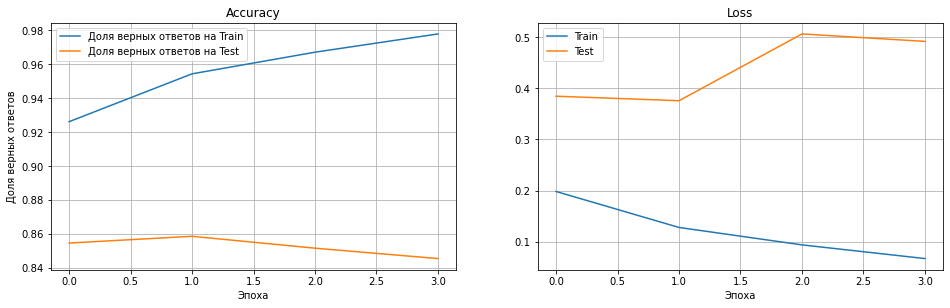

In [73]:
plt.figure(figsize=(16, 10))
plt.subplot(221)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label = 'Доля верных ответов на Train')
plt.plot(history.history['val_accuracy'], label = 'Доля верных ответов на Test')
plt.xlabel('Эпоха')
plt.ylabel('Доля верных ответов')
plt.legend(loc='best')
plt.grid()

plt.subplot(222)
plt.title('Loss')
plt.plot(history.history['loss'], label = 'Train')
plt.plot(history.history['val_loss'], label = 'Test')
plt.xlabel('Эпоха')
plt.legend(loc='best')
plt.grid()
plt.show()

In [83]:
print('Построение модели...')
model = Sequential()
model.add(Embedding(input_dim=number_of_words, output_dim=128, input_length=words_per_review))
model.add(LSTM(units=128, return_sequences=True))
model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

Построение модели...


In [84]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 200, 128)          2560000   
_________________________________________________________________
lstm_18 (LSTM)               (None, 200, 128)          131584    
_________________________________________________________________
lstm_19 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dense_18 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 65        
Total params: 2,831,489
Trainable params: 2,831,489
Non-trainable params: 0
_________________________________________________________________


In [85]:
BATCH_SIZE = 64
NUM_EPOCHS = 2
print('Процесс обучения...')
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE,
          epochs=NUM_EPOCHS,
          validation_data=(x_test, y_test))

score, acc = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)
print('Результат при тестировании:', score)
print('Тестовая точность:', acc)

Процесс обучения...
Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 104s 4ms/sample - loss: 0.4160 - accuracy: 0.8086 - val_loss: 0.3186 - val_accuracy: 0.8679
Epoch 2/2
25000/25000 [==============================] - 17s 677us/sample - loss: 0.3328 - accuracy: 0.8665
Результат при тестировании: 0.3327691626119614
Тестовая точность: 0.86652


#### Изменялись параметры:
- разные объемы обучающих данных (number_of_words) 10000 и 20000. Точность выше при 20000
- разное количество слов в одном отзыве (words_per_review) 80, 100, 200. Точность выше при 200
- пробовал использовать слой GRU вместо LSTM. Результат сопоставим.
- разное количество units в уровнях: 64, 128. Точность выше при большем числе нейронов.
- добавил ещё один LSTM слой с параметром return_sequences
- добавил ещё один выходной слой с количеством units 32|64 и активацией 'relu'

Максимальная точность, которую удалось добиться на тестовых данных 0.8679